In [2]:
import scipy.stats as stats
from collections import defaultdict, namedtuple
import numpy as np
import itertools
import util
import os
import d4j
from itertools import chain, combinations
    
    
def diffprop(obs):
    """
    `obs` must be a 2x2 numpy array.

    Returns:
    delta
        The difference in proportions
    ci
        The Wald 95% confidence interval for delta
    corrected_ci
        Yates continuity correction for the 95% confidence interval of delta.
    """
    n1, n2 = obs.sum(axis=1)
    prop1 = obs[0,0] / n1
    prop2 = obs[1,0] / n2
    delta = prop1 - prop2

    # Wald 95% confidence interval for delta
    se = np.sqrt(prop1*(1 - prop1)/n1 + prop2*(1 - prop2)/n2)
    return delta, 1.96*se + 0.5*(1/n1 + 1/n2)


def row(tbl):
    s = sum(tbl["is_bug"] == "True")
    return [s, len(tbl.index) - s]
        

def rq3(load_func, load_dir):
    result = defaultdict(lambda: {"values": [], "errors": []})
    counter = defaultdict(lambda: {"sig": 0, "insig": 0})
    for name in d4j.NAMES:
#         for ratio in range(25, 525, 25):
        for ratio in [0.025, 0.5]:
            for bug_id in os.listdir(os.path.join(load_dir, name)):
                data = load_func(name, bug_id, ratio)
                if data is None:
                    for t in ["cls_level", "method_level", "stmt_level"]:
                        counter[t + str(ratio)]["insig"] += 1
                    continue

                for t in ["cls_level", "method_level", "stmt_level"]:
                    cnt = counter[t + str(ratio)]
                    top10 = data.nlargest(int(len(data.index) / 10), t)
                    others = data.drop(top10.index)

                    tbl = np.array([row(top10), row(others)], int)
                    try:
                        chi, pval, dof, expected = stats.chi2_contingency(tbl)
                        if pval >= 0.05:
                            cnt["insig"] += 1
                            continue
                            
                        cnt["sig"] += 1
                        delta, se = diffprop(tbl)
                        c = result[t + str(ratio)]
                        c["values"].append(delta)
                        c["errors"].append(se)
                    except ValueError as e:
                        cnt["insig"] += 1
                        pass
    print(i)
    return result, counter
print(rq3(util.load, "cov"))
print(rq3(util.load_pit, "cov_pit"))

defaultdict(<class 'int'>, {'Time': 44, 'Closure': 312, 'Lang': 106, 'Math': 140, 'Chart': 42})
(defaultdict(<function rq3.<locals>.<lambda> at 0x11BCDC40>, {}), defaultdict(<function rq3.<locals>.<lambda> at 0x11BCDB20>, {}))
defaultdict(<class 'int'>, {'Time': 38, 'Closure': 284, 'Lang': 98, 'Math': 134, 'Chart': 38})
(defaultdict(<function rq3.<locals>.<lambda> at 0x04F756E8>, {}), defaultdict(<function rq3.<locals>.<lambda> at 0x04F75778>, {}))


In [11]:
import util
major, major_counter = rq3(util.load, "cov")

Ignore constant value Time 1 0.5 ['True']
Ignore constant value Time 13 0.5 ['True']
Ignore constant value Time 22 0.5 [1.]
Ignore constant value Time 26 0.5 ['True']
Ignore constant value Closure 11 0.025 [0.]
Ignore constant value Closure 11 0.5 [0.]
Ignore constant value Closure 13 0.5 [1.]
Ignore constant value Closure 131 0.5 [1.]
Ignore constant value Closure 133 0.5 [1.]
Ignore constant value Closure 144 0.5 ['True']
Ignore constant value Closure 150 0.5 [1.]
Ignore constant value Closure 160 0.5 [1.]
Ignore constant value Closure 168 0.5 [1.]
Ignore constant value Closure 175 0.5 [0.57142857]
Ignore constant value Closure 18 0.5 [1.]
Ignore constant value Closure 31 0.5 [1.]
Ignore constant value Closure 49 0.5 [1.]
Ignore constant value Closure 59 0.5 [1.]
Ignore constant value Closure 82 0.5 [1.]
Ignore constant value Lang 41 0.025 ['True']
Ignore constant value Lang 11 0.5 ['True']
Ignore constant value Lang 12 0.5 ['True']
Ignore constant value Lang 17 0.5 [0.85714286]
Igno

In [12]:
pit, pit_counter = rq3(util.load_pit, "cov_pit")

Ignore constant value Time 19 0.5 stmt_level
Ignore constant value Time 22 0.5 method_level
Ignore constant value Closure 129 0.025 stmt_level
Ignore constant value Closure 131 0.025 stmt_level
Ignore constant value Closure 165 0.025 method_level
Ignore constant value Closure 37 0.025 stmt_level
Ignore constant value Closure 82 0.025 method_level
Ignore constant value Closure 1 0.5 stmt_level
Ignore constant value Closure 122 0.5 stmt_level
Ignore constant value Closure 129 0.5 stmt_level
Ignore constant value Closure 13 0.5 stmt_level
Ignore constant value Closure 131 0.5 stmt_level
Ignore constant value Closure 144 0.5 is_bug
Ignore constant value Closure 150 0.5 method_level
Ignore constant value Closure 160 0.5 stmt_level
Ignore constant value Closure 165 0.5 method_level
Ignore constant value Closure 175 0.5 stmt_level
Ignore constant value Closure 176 0.5 stmt_level
Ignore constant value Closure 37 0.5 stmt_level
Ignore constant value Closure 4 0.5 stmt_level
Ignore constant valu

In [13]:
major_counter

defaultdict(<function __main__.rq3.<locals>.<lambda>()>,
            {'cls_level0.025': {'sig': 232, 'insig': 90},
             'method_level0.025': {'sig': 276, 'insig': 46},
             'stmt_level0.025': {'sig': 282, 'insig': 40},
             'cls_level0.5': {'sig': 210, 'insig': 112},
             'method_level0.5': {'sig': 234, 'insig': 88},
             'stmt_level0.5': {'sig': 224, 'insig': 98}})

In [14]:
pit_counter

defaultdict(<function __main__.rq3.<locals>.<lambda>()>,
            {'cls_level0.025': {'sig': 224, 'insig': 72},
             'method_level0.025': {'sig': 255, 'insig': 41},
             'stmt_level0.025': {'sig': 250, 'insig': 46},
             'cls_level0.5': {'sig': 194, 'insig': 102},
             'method_level0.5': {'sig': 199, 'insig': 97},
             'stmt_level0.5': {'sig': 198, 'insig': 98}})

In [9]:
import pandas as pd
import numpy as np
x = ["M", "P"]
for idx, d in enumerate([major, pit]):
    print(x[idx])
    df = {k: np.median(v["values"]) for k, v in d.items()}
    print(df["cls_level0.025"] - df["method_level0.025"])
    print(df["cls_level0.025"] - df["stmt_level0.025"])
    print(df["cls_level0.5"] - df["method_level0.5"])
    print(df["cls_level0.5"] - df["stmt_level0.5"])

M
-0.14655555555555555
-0.16788888888888892
-0.15222222222222223
-0.27361111111111114
P
-0.16727777777777775
-0.17927777777777776
-0.24227777777777776
-0.2428333333333333


/home/mingwan/irrelevant/py/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


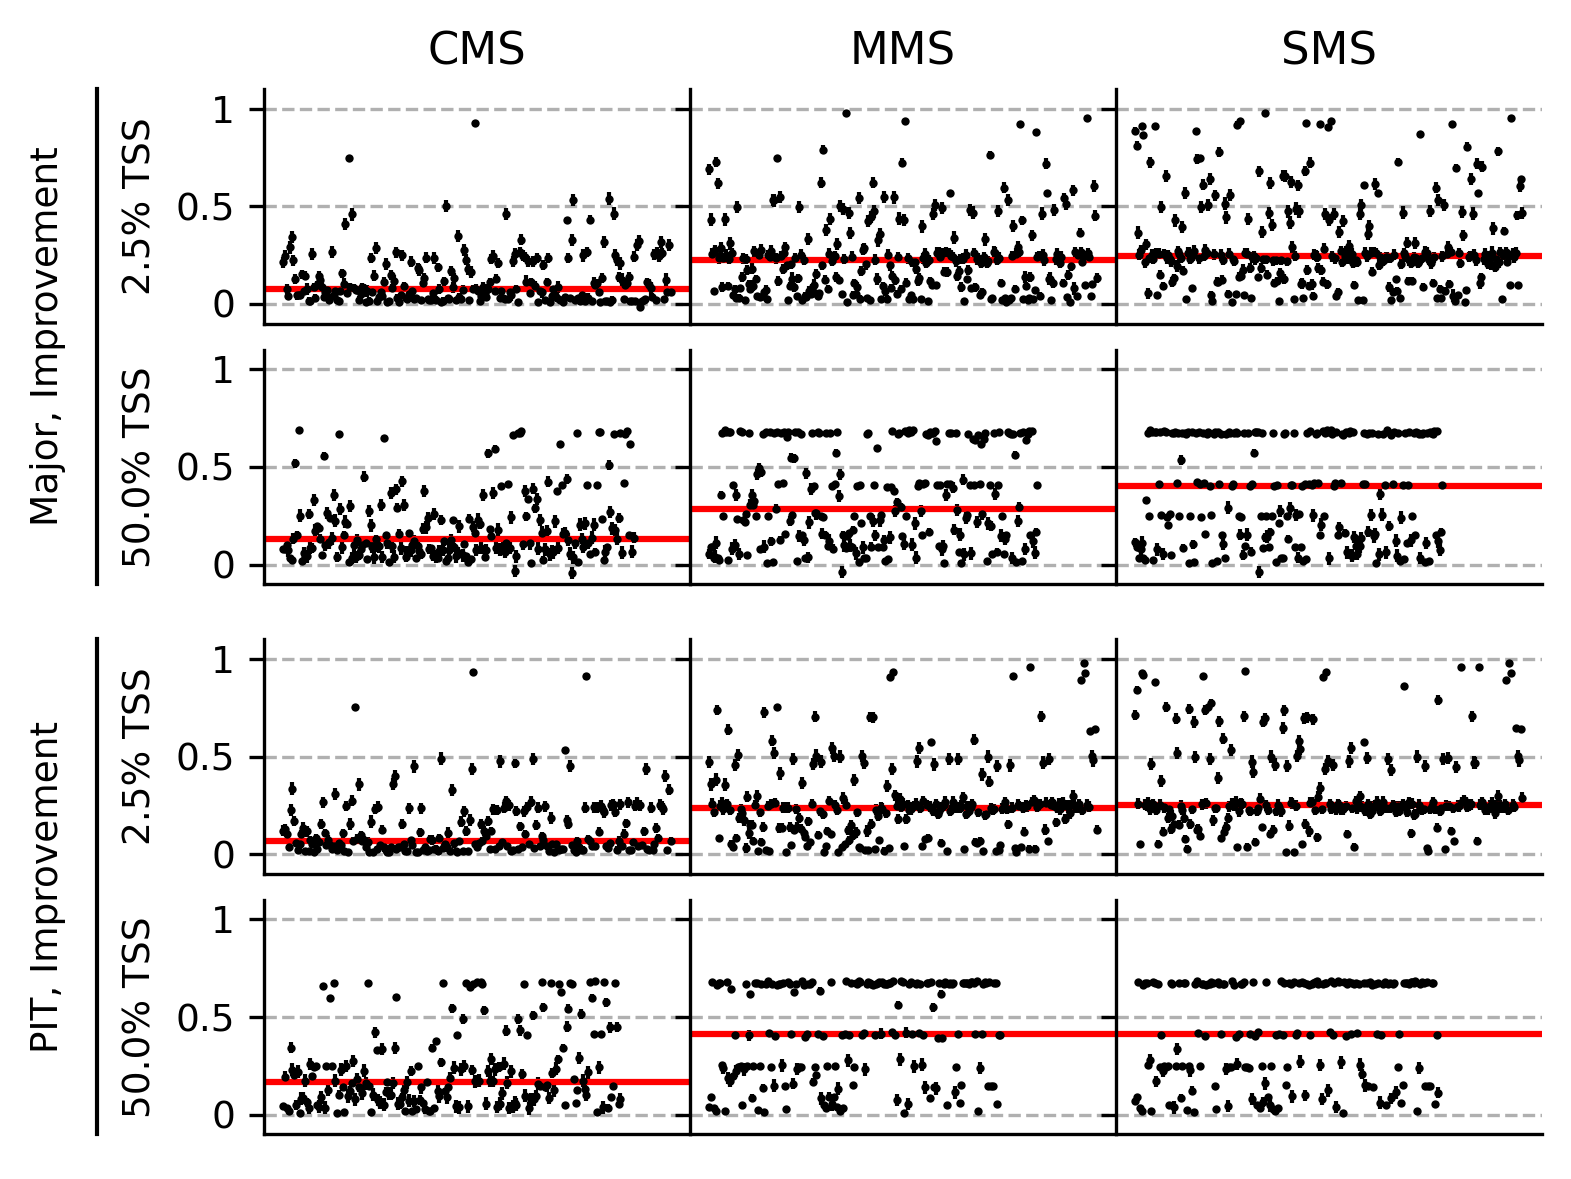

In [21]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 9}
matplotlib.rc('font', **font)

fig = plt.figure(dpi=300, figsize=(5,4,))
outer = plt.GridSpec(2, 1, figure=fig)
outer.update(left=0.01)
aux1 = fig.add_subplot(outer[0])
aux1.set_ylabel("Major, Improvement")
aux2 = fig.add_subplot(outer[1])
aux2.set_ylabel("PIT, Improvement")
for ax in [aux1, aux2]:
    ax.tick_params(size=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_facecolor("none")
    for pos in ["right", "top", "bottom"]:
        ax.spines[pos].set_visible(False)
    ax.spines["left"].set_linewidth(1)
    ax.spines["left"].set_color("black")

levels = [("CMS", "cls_level",), ("MMS", "method_level",), ("SMS", "stmt_level",)]
ratios = [0.025, 0.5]
outer = plt.GridSpec(2, 1, figure=fig)
names = ["Major", "PIT"]

for idxx, obj in enumerate([major, pit]):
    title_name = names[idxx]
    inner = outer[idxx].subgridspec(2, 3)
    x_rep = []
    y_rep = []
    for idx in range(6):
        col = int(idx / 2)
        row = int(idx % 2)
        sharex = None if row == 0 else x_rep[col]
        sharey = None if col == 0 else y_rep[row]            
        ax = fig.add_subplot(inner[row, col], sharex=sharex, sharey=sharey)
        ratio = ratios[row]
        name, t = levels[col]
        
        if sharex == None:
            x_rep.append(ax)

        if sharey == None:
            y_rep.append(ax)

        if col != 0:
            plt.setp(ax.get_yticklabels(), visible=False)

        t = t + str(ratio)
        data = obj[t]
        values = data["values"]
        median = np.median(values)
        errors = data["errors"]
        ax.errorbar(range(len(values)), values, yerr=errors, fmt='o', markersize=2, ecolor='black', lw=1, capsize=1, capthick=1, markerfacecolor="black", markeredgewidth=0)
        if row == 0 and idxx == 0:
            ax.set_title(name)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.get_xaxis().grid(False)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().grid(True, linestyle='--')
        ax.axhline(y=median, color='r', linestyle='-')

        ax.set_ylim(-0.1, 1.1)
        plt.yticks([0, 0.5, 1], [0, 0.5, 1])
        if col == 0:
            ax.set_ylabel("{}% TSS".format(str(ratio * 100)))

fig.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.savefig('../seke/fig7.png', format='png', dpi=300, bbox_inches='tight')